# General statistics

In [1]:
import sys
sys.path.append("../src/")
import re
import random
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from PFEmodules import *
# For help on the stuff available in the PFEmodules: (uncomment to see help page)
#help(frequency)
#help(student)
#help(counters)
#help(distribution)
#help(dictops)
#help(fn)
pd.options.display.max_columns = 100
color_arr=["#63386b","#66b84c","#6a46c3","#bfa04c","#cb54c3","#506833","#d06182","#5cad9b","#d85a36","#7d8bc5","#884835"]

In [2]:
# Loading dfs
df = pd.read_csv("../data/data-prepped.csv")
try:
    df.drop(columns="Unnamed: 0", inplace=True)
except:
    pass

# Initialize a Distribution object for further use
Distributor = Distribution(df)

### Study of the courses distribution

#### Below is a plot which shows the distribution of courses among the categories defined in 2-data-preparation.
Reading the graph: on the whole period, there are 124 different courses in the marketing (MK) category, 62 different courses of finance (GF) etc.

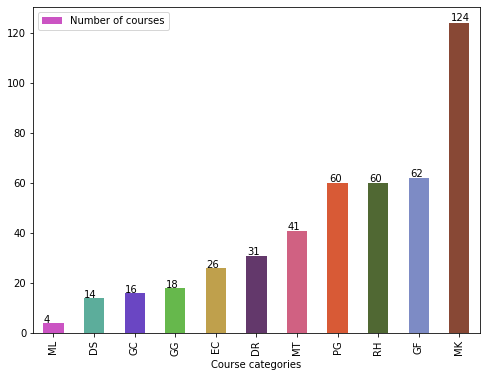

In [3]:
df_count_courses = (df.groupby("CODE_COURS")["CODE_EPR"]
         .nunique()
         .reset_index(name="Number of courses")
          )

ax = (df_count_courses.sort_values(by="Number of courses")
      .plot(x="CODE_COURS",
            y="Number of courses",
            kind="bar",
            figsize=(8,6),
            color=Distributor.color_maker(df_count_courses, "Number of courses")))

ax.set_xlabel("Course categories")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

#### The graph below shows how many students have attended (at least) 1 course of each category.
Reading the graph: on the whole period, 8174 students have taken (at least) 1 course in marketing, 6910 have taken a course in finance etc.

In [4]:
list_of_df = []
for year in list(range(1998,2021)):
    list_of_df.append(df[df["EXERCICE"] == year].groupby("CODE_COURS")[
                "CODELEV"].nunique().reset_index(name="Nb élèves").sort_values(by="Nb élèves"))

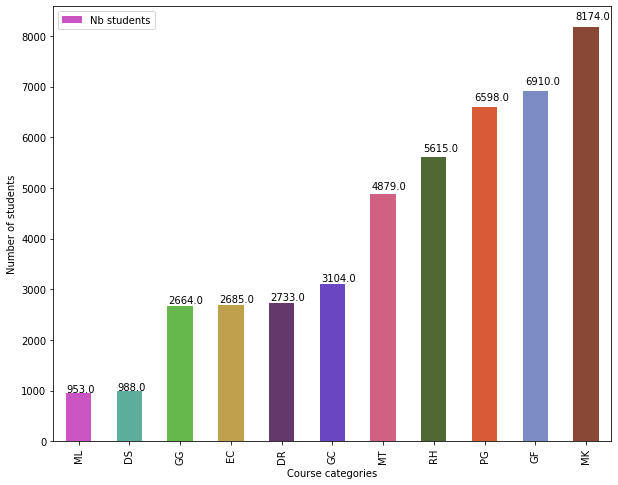

In [5]:
df_courses_elev = (df.groupby("CODE_COURS")["CODELEV"]
                   .nunique()
                   .reset_index(name="Nb students")
                   .sort_values(by="Nb students")
                  )

ax = df_courses_elev.plot(x="CODE_COURS", y="Nb students",
                          kind='bar', stacked=True, 
                          figsize = (10, 8), 
                          color=Distributor.color_maker(df_courses_elev, "Nb students"))

ax.set_xlabel("Course categories")
ax.set_ylabel("Number of students")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.02))

### Historical distribution of the courses
Reading the graph: In 2001, 23 students have taken an economy course (EC), 226 a finance course (GF) etc.
* It can be observed that finance and marketing are almost always the top subjects.
* There is a sensitiive drop in the popularity of HR courses throughout the years.
* Around 2010, supply chain courses (MT) start rising in popularity.
* Data science and Maker's Lab courses appear in 2015. 
    * Data science courses popularity rises extremely fast: starting with only 15 students in 2015 (last position), they occupy the 4th position in 2020.
    * Maker's Lab courses follow a similar trajectory, albeit less evident.

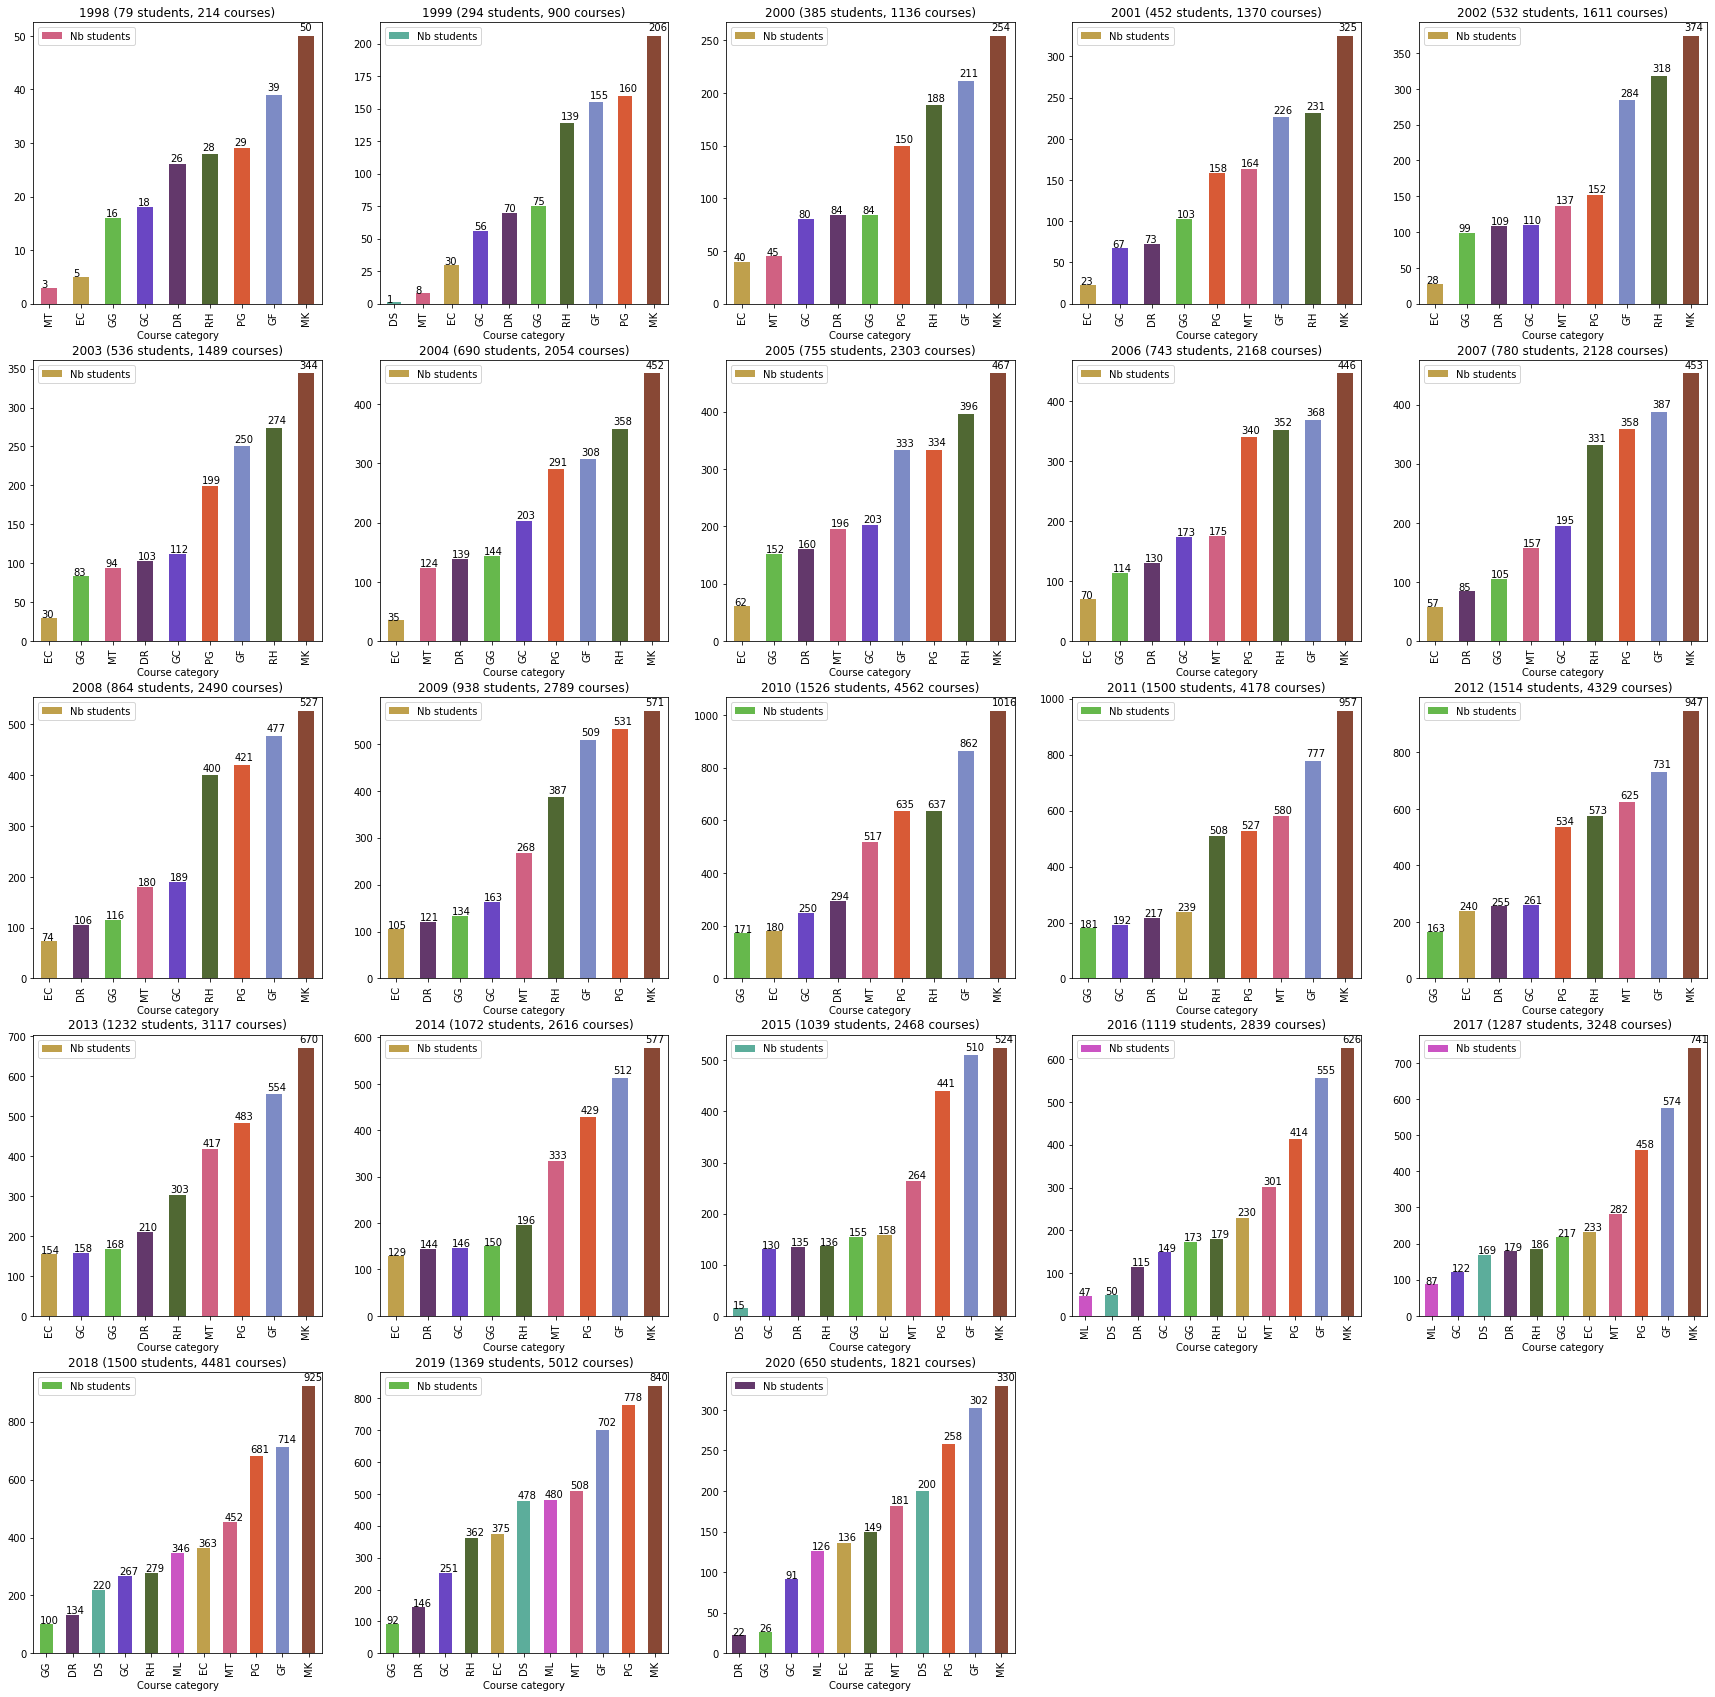

In [6]:
Distributor.series_plotter(list(range(1998,2021)), save=True)